**Task 1: Transition Matrix and Directed Graph for k = 2**

Transition Matrix for k = 2:
[[0.   1.   0.   0.   0.  ]
 [0.5  0.   0.   0.   0.  ]
 [0.   0.25 0.   0.25 0.  ]
 [0.   0.   0.   0.   0.5 ]
 [0.   0.   0.   1.   0.  ]]


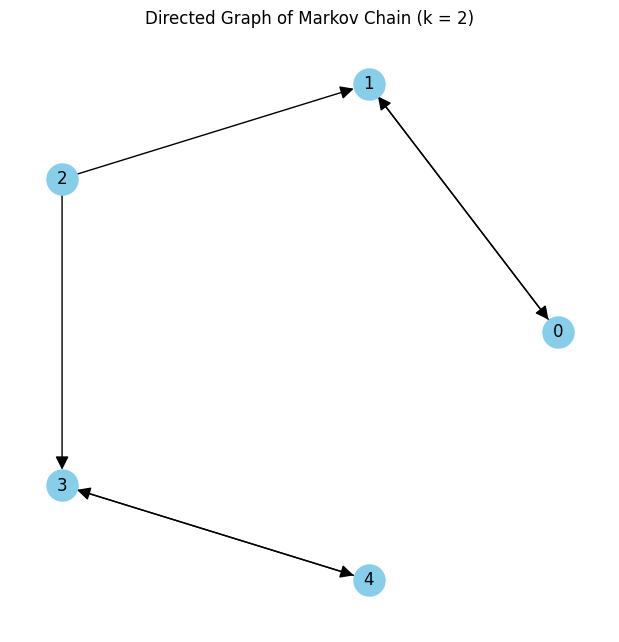

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def transition_matrix_Ehrenfest_urn(k):
    size = 2 * k + 1
    P = np.zeros((size, size))

    for i in range(1, size - 1):
        P[i][i - 1] = (k - (i - 1)) / (2 * k)
        P[i][i + 1] = (i - 1) / (2 * k)

    P[0][1] = 1
    P[size - 1][size - 2] = 1

    return P

# Generate transition matrix for k = 2
k_value = 2
transition_matrix = transition_matrix_Ehrenfest_urn(k_value)
print("Transition Matrix for k = 2:")
print(transition_matrix)

# Draw directed graph of the chain for k = 2
G = nx.DiGraph(transition_matrix)
pos = nx.circular_layout(G)
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', arrowsize=20)
plt.title("Directed Graph of Markov Chain (k = 2)")
plt.show()

**Task 2: Irreducibility Check**

In [2]:
# Check irreducibility of the transition matrix for k = 2
is_irreducible = np.all(np.linalg.matrix_power(transition_matrix, 2) > 0)
print(f"The transition matrix for k = 2 is irreducible: {is_irreducible}")

The transition matrix for k = 2 is irreducible: False


**Task 3: Convergence of P^n as n → ∞**

In [3]:
# Check convergence of P^n as n → ∞ for k = 2
n = 100
P_power = np.linalg.matrix_power(transition_matrix, n)
print(f"P^n for k = 2 as n → ∞:")
print(P_power)

P^n for k = 2 as n → ∞:
[[8.88178420e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 8.88178420e-16 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.22044605e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.88178420e-16
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.88178420e-16]]


**Task 4: Stationary Distribution Plot for k = 100**

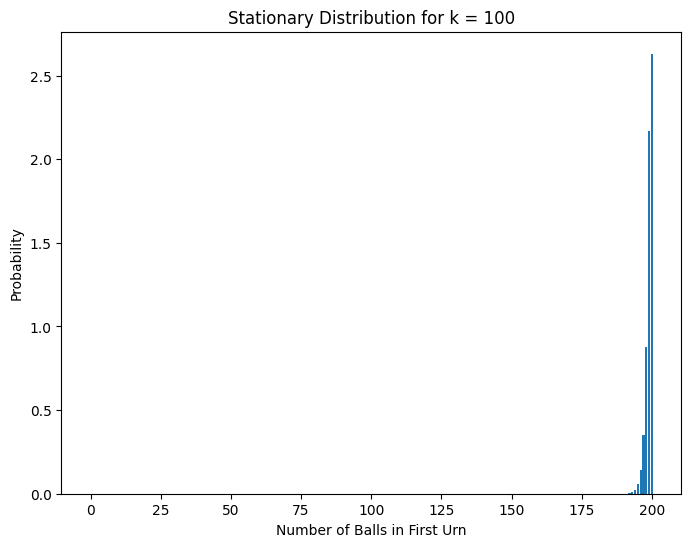

In [8]:
# Calculate eigenvalues and eigenvectors for k = 100
k_value = 100
transition_matrix_k_100 = transition_matrix_Ehrenfest_urn(k_value)
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix_k_100.T)

# Find the dominant eigenvalue (closest to 1 in absolute value)
index = np.argmax(np.abs(eigenvalues - 1))
dominant_eigenvalue = eigenvalues[index]
dominant_eigenvector = eigenvectors[:, index]

stationary_distribution = np.abs(dominant_eigenvector / np.sum(dominant_eigenvector))

# Plot the stationary distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(stationary_distribution)), stationary_distribution)
plt.title("Stationary Distribution for k = 100")
plt.xlabel("Number of Balls in First Urn")
plt.ylabel("Probability")
plt.show()